------------------
#### ANOVA
-------------------
- __Analysis of Variance (ANOVA)__ is a statistical method used to test differences between two or more means. 

- While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to encounter a Type I error. 

- An ANOVA will provide an __F-statistic__ which can, along with degrees of freedom, be used to calculate a p value.

**Examples:**

- A group of psychiatric patients are trying 3 different therapies: 
    - counseling, 
    - medication and 
    - biofeedback. 

You want to see if one therapy is better than the others.

- A manufacturer has 2 different processes to make light bulbs. They want to know if one process is better than the other.

- Students from different colleges take the same exam. You want to see if one college outperforms the other.

#### 1-way analysis of variance (ANOVA) 

- is used to determine whether there are any statistically significant differences between the means of 3 or more independent (unrelated) groups. 

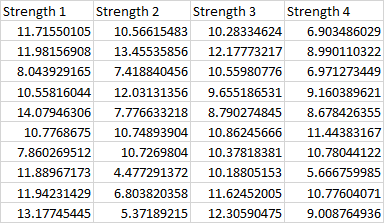

#### What are the hypotheses of a One-Way ANOVA?
In a one-way ANOVA there are two possible hypotheses.

- `The null hypothesis` ($H_0$) is that there is `no difference between the groups` and equality between means. (Walruses weigh the same in different months)
- The `alternative hypothesis` ($H_1$) is that there is a difference between the means and groups. (Walruses have different weights in different months) 

When we set the null hypothesis, which is basically $H_0$
- principles of
    - Equality
    - No change
    - No effect
    - No benefit
    - Status quo
    - No deviation
    - No relation (X and y)
- the actual hypothesis tests that we run (t-test, chi-2, ANOVA)
    - they are designed keeping the principles mentioned earlier

- Check the tech documentation on the statistical tests

- How do we disprove the NULL hypothesis
    - run many tests, collect more samples (runs)
    - if the original $H_0$ itself set wrongly
        - mean score of the batch is 9.0 out of 10

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

#### Ex1. 

- Plant Growth Data Set 

$H_0$ : null hypothesis is that there is `no difference` between the means of the weights of dried plants under control and 2 different treatment conditions.

In [2]:
ctrl = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

- __stats.f_oneway__ functions takes the groups as input and returns F and P-value

In [4]:
fvalue, pvalue = stats.f_oneway(ctrl, trt1, trt2)
print(fvalue, pvalue)

4.846087862380136 0.0159099583256229


- p < 0.05, 

- we can `reject the null hypothesis` that there is no difference between the means of the weights of dried plants under control and each of the 2 different treatment conditions.

#### Ex2. 

In [5]:
# Sample data for three groups
group1 = np.array([20, 22, 25, 28, 32])
group2 = np.array([18, 24, 28, 32, 36])
group3 = np.array([15, 20, 25, 30, 35])

In [6]:
# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(group1, group2, group3)

In [7]:
# Set significance level (alpha)
alpha = 0.05

In [8]:
# Define degrees of freedom
df_between = 2  # Number of groups minus 1
df_within  = len(group1) + len(group2) + len(group3) - 3  # Total sample size minus the number of groups

In [9]:
# Find the critical value from the F-distribution
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

In [10]:
# Print the ANOVA results and critical value
print("One-way ANOVA results:")
print(f"F-statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Critical Value: {critical_value}")

One-way ANOVA results:
F-statistic: 0.21923937360178974
P-value: 0.8062762469395943
Critical Value: 3.8852938346523933


In [11]:
# Compare the F-statistic with the critical value
if statistic > critical_value:
    print("Reject the null hypothesis. There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis. No significant differences between group means.")

Fail to reject the null hypothesis. No significant differences between group means.


#### Visualize the critical region

In [11]:
import matplotlib.pyplot as plt

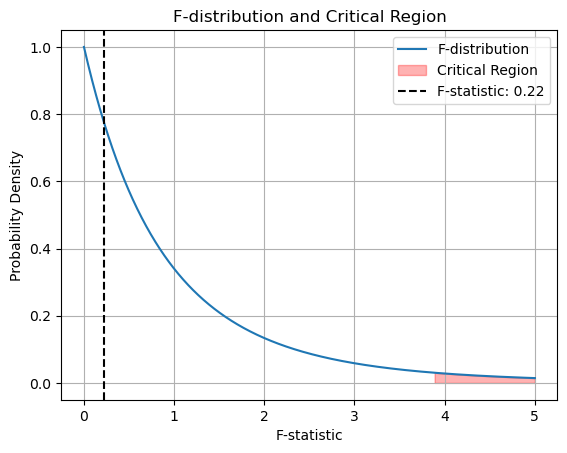

In [14]:
# Plot the F-distribution
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, df_between, df_within)

plt.plot(x, y, label='F-distribution')

# Shade the critical region
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.3, label='Critical Region')

# Mark the F-statistic
plt.axvline(x=statistic, color='black', linestyle='--', label=f'F-statistic: {statistic:.2f}')

# Set labels and legend
plt.title('F-distribution and Critical Region')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.grid()
plt.legend();